In [1]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv('employee_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
#checking percentage of employees in data with attrition
df.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [4]:
df.Attrition = pd.get_dummies(df.Attrition)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Testing a logistic regression model using statsmodels

In [10]:
# Building a logistic regression model using statsmodels
# I know this won't be my final model, so I use X2 and y2 to distinguish from the better
#model to come
dummy_dataframe = pd.get_dummies(df)
y2 = dummy_dataframe.Attrition
X2 = dummy_dataframe.drop('Attrition', axis=1)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,0,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,1,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,0,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,1,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,1,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [8]:
X2 = sm.tools.add_constant(X2)
logit_model = sm.Logit(y, X2)
result = logit_model.fit()

         Current function value: inf
         Iterations: 35


In [9]:
# Summary table
result.summary()
#High P values on several features:
# 'DailyRate', 'Education', 'Employee Count', "EmployeeNumber", 'HourlyRate', 'JobLevel',
# 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating', 'StandardHours',
# 'StockOptionLevel', 'BusinessTravel', 'EducationField', 'MaritalStatus', 'Overtime'

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1424
Method:                           MLE   Df Model:                           45
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                     inf
Time:                        14:22:40   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                   0.0315      0.014      2.320      0.020       0.005       0.058
DailyRate                             0.0003      0.000      1.290      0.197      -0.000       0.001
DistanceFromHome                     -0.0459      0.011     -4.250      0.000      -0.067      -0.025
Education                            -0.0115      0.088     -0.130      0.896      -0.184       0.161
EmployeeCount                        -0.0003   3.38e+06  -7.93e-11      1.000   -6.62e+06    6.62e+06
EmployeeNumber                        0.0002      0.000      1.015      0.310      -0.000       0.000
EnvironmentSatisfaction               0.4341      0.083      5.229      0.000       0.271       0.597
HourlyRate                           -0.0012      0.004     -0.262      0.793      -0.010       0.007
JobInvolvement                        0.5269      0.123      4.294      0.000       0.286       0.767
JobLevel                              0.0938      0.316      0.296      0.767      -0.526       0.714
JobSatisfaction                       0.4143      0.082      5.082      0.000       0.255       0.574
MonthlyIncome                     -1.347e-05   8.15e-05     -0.165      0.869      -0.000       0.000
MonthlyRate                       -5.612e-06   1.25e-05     -0.448      0.654   -3.02e-05     1.9e-05
NumCompaniesWorked                   -0.1945      0.039     -5.008      0.000      -0.271      -0.118
PercentSalaryHike                     0.0233      0.039      0.592      0.554      -0.054       0.100
PerformanceRating                    -0.1165      0.399     -0.292      0.770      -0.899       0.666
RelationshipSatisfaction              0.2654      0.083      3.201      0.001       0.103       0.428
StandardHours                        -0.0216   1.42e+04  -1.51e-06      1.000   -2.79e+04    2.79e+04
StockOptionLevel                      0.1930      0.159      1.216      0.224      -0.118       0.504
TotalWorkingYears                     0.0599      0.029      2.042      0.041       0.002       0.117
TrainingTimesLastYear                 0.1884      0.073      2.576      0.010       0.045       0.332
WorkLifeBalance                       0.3725      0.124      2.999      0.003       0.129       0.616
YearsAtCompany                       -0.0961      0.039     -2.470      0.014      -0.172      -0.020
YearsInCurrentRole                    0.1513      0.046      3.323      0.001       0.062       0.241
YearsSinceLastPromotion              -0.1735      0.042     -4.090      0.000      -0.257      -0.090
YearsWithCurrManager                  0.1367      0.047      2.907      0.004       0.045       0.229
BusinessTravel_Non-Travel             0.9786   3.58e+06   2.73e-07      1.000   -7.01e+06    7.01e+06
BusinessTravel_Travel_Frequently     -0.9306   3.29e+06  -2.83e-07      1.000   -6.45e+06    6.45e+06
BusinessTravel_Travel_Rarely         -0.0483   3.41e+06  -1.42e-08      1.000  

In [31]:
# I ran the subsequent code dropping these features with the higher P values
#This resulted in a model that was less accurate than including all features.

# df2 = df.drop(columns=['DailyRate', 'Education', 'EmployeeCount', "EmployeeNumber",
#                        'HourlyRate', 'JobLevel','MonthlyIncome', 'MonthlyRate', 
#                        'PercentSalaryHike', 'PerformanceRating', 'StandardHours',
#                        'StockOptionLevel', 'BusinessTravel', 'EducationField', 
#                        'MaritalStatus', 'OverTime'])
# y = df2.Attrition
# X = df2.drop('Attrition', axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y = df.Attrition
X = df.drop('Attrition', axis = 1)
#normalizing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
#Verifying we have the current distribution of attrition/no attrition in training and test data
print("Train percent attrition/no attrition:", y_train.value_counts(normalize=True)[1])
print("Test percent attrition/no attrition: ", y_test.value_counts(normalize=True)[1])


Train percent attrition/no attrition: 0.8284936479128857
Test percent attrition/no attrition:  0.8695652173913043


In [23]:
#Separating X data into continuous vs. categorical
X_train_cont = X_train.select_dtypes(include='number')
X_test_cont = X_test.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

#Dummy encoding categorical values using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

X_train_preprocessed = np.concatenate([X_train_cont, X_train_cat.todense()], axis=1)
X_test_preprocessed = np.concatenate([X_test_cont, X_test_cat.todense()], axis=1)

In [33]:
X_train = X_train_preprocessed
X_test = X_test_preprocessed

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.42880806074063127

In [26]:
from sklearn.metrics import log_loss
import numpy as np

log_loss(y_train, np.zeros(len(y_train)))

28.61515684986702

In [27]:
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train, eval_metric='rmse')

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 86.96%


In [28]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [29]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train, eval_metric='rmse')

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 99.82%
Validation accuracy: 87.77%


In [38]:
#Creating Confusion Matrix
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
y_hat_test = logreg.predict(X_test)

def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 313, 'TN': 19, 'FP': 29, 'FN': 7}

In [39]:
#Checking work with sklearn
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 19  29]
 [  7 313]]


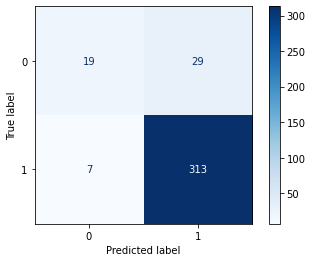

In [41]:
#Visual of Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues);